In [2]:
# Importing necessary modules

# Importing arrays and matrices processing modules
import pandas as pd
import numpy as np

# Importing modules for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Modules for preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Module for splitting data and selecting features
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Importing machine learning techniques
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing evaluation metrics
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Importing display related modules

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

In [4]:
# Loading the data into a pandas dataframe

income_df = pd.read_csv('income_evaluation.csv')

In [5]:
# Displaying basic information about the dataframe

income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Describing analytical values of all attributes

income_df.describe(include = "all")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [7]:
# Displaying a few sample rows
income_df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
19525,47,Private,178341,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,46,United-States,>50K
18439,57,Private,158827,HS-grad,9,Separated,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
28355,21,Private,138768,Some-college,10,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K
7760,20,Federal-gov,147352,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
23498,53,State-gov,58913,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,42,United-States,>50K


In [8]:
# Basic Information
print("The no. of rows and columns in the unprocessed dataset is: {}".format(income_df.shape))
print("The names of the columns before processing them are: \n {}".format(income_df.columns))

The no. of rows and columns in the unprocessed dataset is: (32561, 15)
The names of the columns before processing them are: 
 Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')


In [9]:
# Removing spaces from columns

income_df.columns = list(map(lambda a: a.lstrip(), income_df.columns))
print("The names of the columns after processing them are: \n {}".format(income_df.columns))

The names of the columns after processing them are: 
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [10]:
# Identifying duplicates

duplicate_rows = income_df.duplicated().sum()
print("The number of duplicate rows are: {}".format(duplicate_rows))

The number of duplicate rows are: 24


In [11]:
# Listing down the duplicate rows for reference

duplicated_rows_df = income_df[income_df.duplicated()]
duplicated_rows_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [12]:
# Removing the duplicated rows from the original dataframe

income_df = income_df.drop_duplicates()
print(income_df.duplicated().sum())

0


In [13]:
# Checking if there are any null values in the dataset

income_df.isnull().sum(axis = 0) # Axis = 0 gives count of number of null values for all the columns

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [14]:
# Since there are no null values, we'll check the actual values in each column
# First, we'll check the values for columns with datatype = object (the columns with datatype=int64 have no null values
# and all of them can use only the int64 format, so there are values available in all quantitative attributes)

# We'll look into each column one by one

print("value counts for the workclass attribute: \n {}".format(income_df['workclass'].value_counts()))

value counts for the workclass attribute: 
  Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [15]:
# Here, we have 1836 rows with value '?' in the workclass attribute, which makes no sense. So, we'll remove all
# the rows that have '?' as one of the value in any of the rows

initial_df_shape = income_df.shape


# Replacing ' ?' to null value in all the columns
for column in income_df.columns:
    income_df[column].replace(' ?', np.NaN, inplace=True)
    
# Removing all the columns with null values
income_df = income_df.dropna().reset_index().drop(columns=['index'])

final_df_shape = income_df.shape

print("Initial shape of dataframe: {} \nFinal shape of dataframe: {}".format(initial_df_shape, final_df_shape))

Initial shape of dataframe: (32537, 15) 
Final shape of dataframe: (30139, 15)


In [81]:
# Checking values for education column
print("value counts for the education attribute: \n{}".format(income_df['education'].value_counts()))


value counts for the education attribute: 
 HS-grad         9834
 Some-college    6669
 Bachelors       5042
 Masters         1626
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          556
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          287
 1st-4th          149
 Preschool         44
Name: education, dtype: int64


In [16]:
# Checking values for marital-status column
print("value counts for the marital-status attribute: \n{}".format(income_df['marital-status'].value_counts()))

value counts for the marital-status attribute: 
 Married-civ-spouse       14059
 Never-married             9711
 Divorced                  4212
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital-status, dtype: int64


In [17]:
# Checking values for occupation column
print("value counts for the occupation attribute: \n{}".format(income_df['occupation'].value_counts()))

value counts for the occupation attribute: 
 Prof-specialty       4034
 Craft-repair         4025
 Exec-managerial      3991
 Adm-clerical         3719
 Sales                3584
 Other-service        3209
 Machine-op-inspct    1964
 Transport-moving     1572
 Handlers-cleaners    1349
 Farming-fishing       987
 Tech-support          911
 Protective-serv       644
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64


In [18]:
# Checking values for 'relationship' column
print("value counts for the occupation attribute: \n{}".format(income_df['relationship'].value_counts()))

value counts for the occupation attribute: 
 Husband           12457
 Not-in-family      7714
 Own-child          4462
 Unmarried          3211
 Wife               1406
 Other-relative      889
Name: relationship, dtype: int64


In [19]:
# checking values for 'race' column
print("value counts for the occupation attribute: \n{}".format(income_df['race'].value_counts()))

value counts for the occupation attribute: 
 White                 25912
 Black                  2816
 Asian-Pac-Islander      894
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64


In [20]:
# checking values for 'sex' column
print("value counts for the occupation attribute: \n{}".format(income_df['sex'].value_counts()))

value counts for the occupation attribute: 
 Male      20366
 Female     9773
Name: sex, dtype: int64


In [21]:
# checking values for 'native-country' column
print("value counts for the occupation attribute: \n{}".format(income_df['native-country'].value_counts()))

value counts for the occupation attribute: 
 United-States                 27487
 Mexico                          606
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Columbia                         56
 Poland                           56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                          

In [22]:
# Checking values for 'income' column
print("value counts for the occupation attribute: \n{}".format(income_df['income'].value_counts()))

value counts for the occupation attribute: 
 <=50K    22633
 >50K      7506
Name: income, dtype: int64


Text(0, 0.5, 'Count of observations')

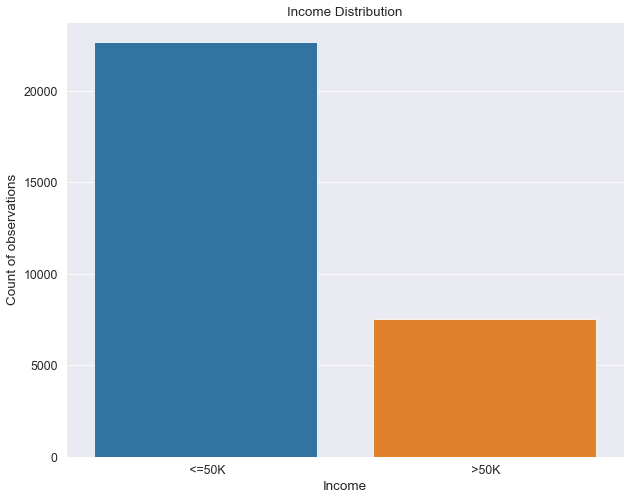

In [23]:
# Understanding the data distribution

plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
sns.set_context('paper', font_scale = 1.4)
sns.countplot(x = 'income', data = income_df)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count of observations')

In [24]:
# We'll change the dependent variable into binary value: 1 for Income > 50K and 0 for Income <= 50K

income_df['income'].replace([' <=50K',' >50K'], [0, 1], inplace = True)


Text(0, 0.5, 'Count of observations')

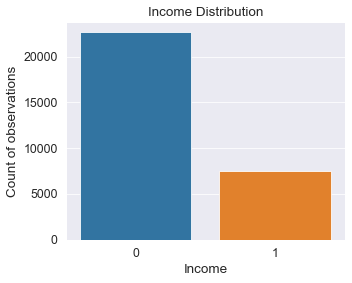

In [25]:
# Plotting the graph again for reference

plt.figure(figsize = (5,4))
sns.set_style('darkgrid')
sns.set_context('paper', font_scale = 1.4)
sns.countplot(x = 'income', data = income_df)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count of observations')

In [26]:
# Building the correlation matrix in the form of a heatmap

income_dx = income_df.drop(columns = ['income']).corr()
income_dx

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076279,0.043203,0.080162,0.060141,0.101348
fnlwgt,-0.076279,1.000000,-0.045199,0.000420,-0.009755,-0.023033
education-num,0.043203,-0.045199,1.000000,0.124455,0.079613,0.152842
capital-gain,0.080162,0.000420,0.124455,1.000000,-0.032255,0.080429
capital-loss,0.060141,-0.009755,0.079613,-0.032255,1.000000,0.052380
hours-per-week,0.101348,-0.023033,0.152842,0.080429,0.052380,1.000000


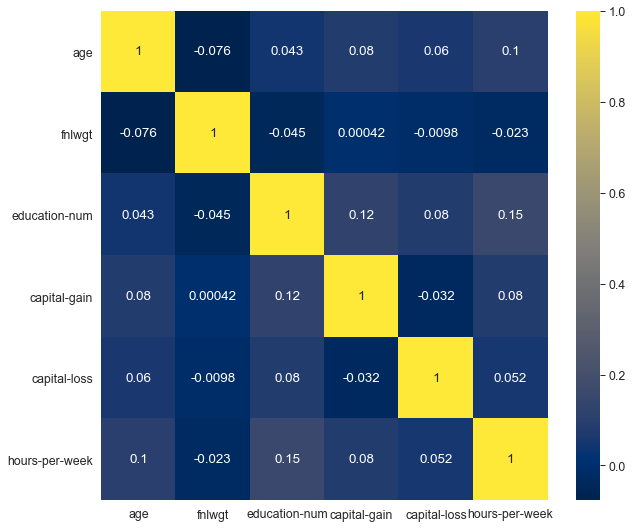

In [27]:
plt.figure(figsize = (10, 9))
sns.heatmap(income_dx, annot = True, cmap = 'cividis')

In [28]:
# Based on the heatmap, we can clearly see that there is barely any correlation among the numerical variables.
# It acts in favour of us, since it means that there is almost no issue of multicollinearity, and all of the 
# quantitative variables can be used directly for analysis

In [29]:
# Let's build a temporary dataframe to conduct numerical analysis on the quantitative variables

num_income_df = income_df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

num_income_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
30134,27,257302,12,0,0,38
30135,40,154374,9,0,0,40
30136,58,151910,9,0,0,40
30137,22,201490,9,0,0,20


In [30]:
num_income_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30139.0,38.441720,13.131426,17.0,28.0,37.0,47.0,90.0
fnlwgt,30139.0,189795.025980,105658.624341,13769.0,117627.5,178417.0,237604.5,1484705.0
education-num,30139.0,10.122532,2.548738,1.0,9.0,10.0,13.0,16.0
capital-gain,30139.0,1092.841202,7409.110596,0.0,0.0,0.0,0.0,99999.0
capital-loss,30139.0,88.439928,404.445239,0.0,0.0,0.0,0.0,4356.0
hours-per-week,30139.0,40.934703,11.978753,1.0,40.0,40.0,45.0,99.0


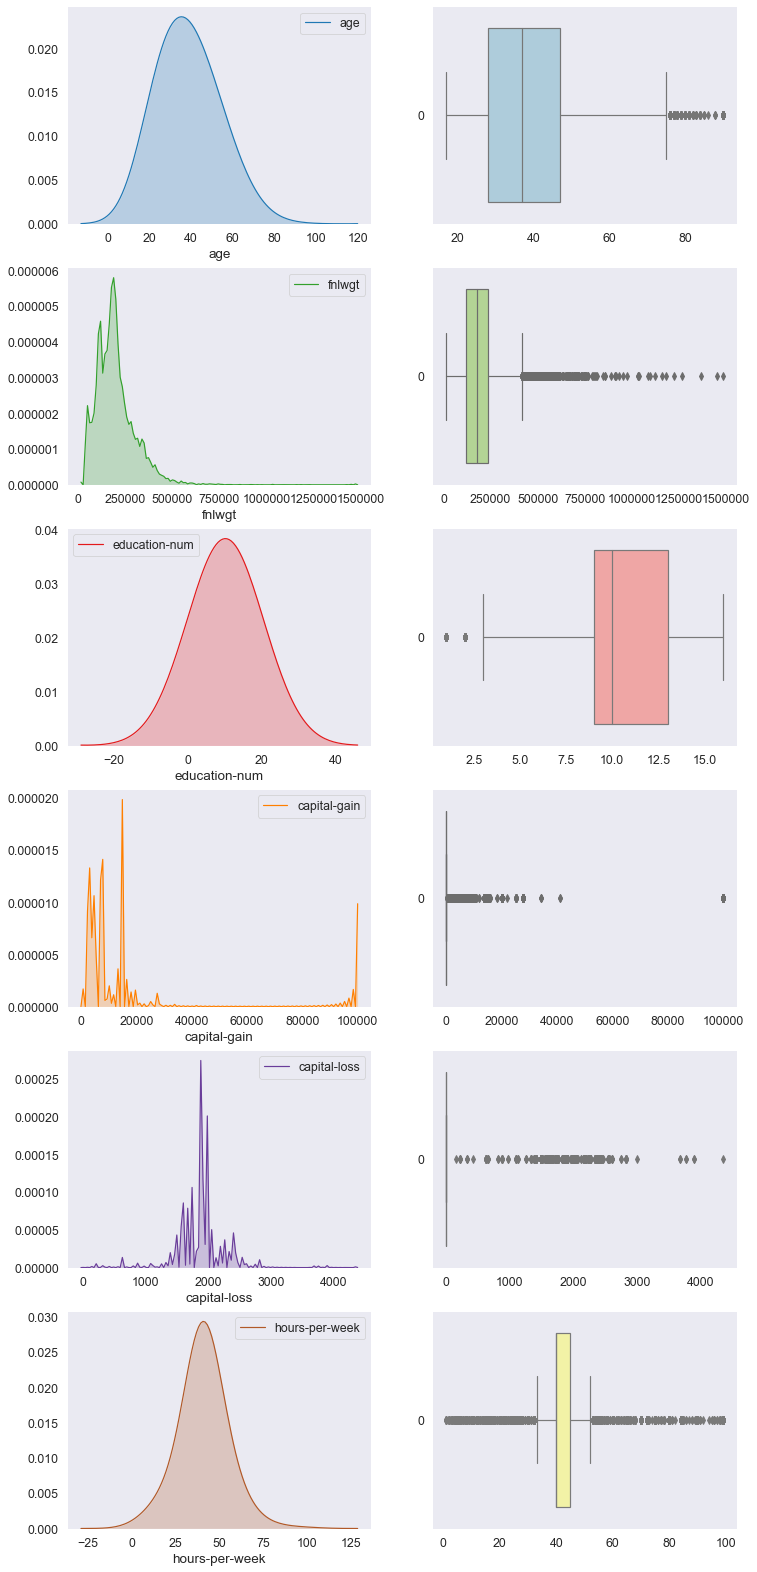

In [31]:
# Plotting graphs for all the quantative variables

sns.set_style('dark')
colors = list(sns.color_palette("Paired"))
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12,28))
for i in range(6):
    sns.kdeplot(num_income_df.iloc[:, i], 
                shade = True, bw = 10,
                color = colors[i*2+1], 
                ax=ax[i, 0]).set(ylabel = '', xlabel = num_income_df.columns[i])
    
    sns.boxplot(data=num_income_df.iloc[:, i],
                color = colors[i*2], orient="h",
                ax=ax[i, 1]).set(xlabel = '', ylabel = '')
plt.show()

In [32]:
### Standardizing data and preparing necessary variables 

# Including dummy columns to address categorical columns

income_df_dum = pd.get_dummies(income_df)


In [33]:
# Number of and rows and columns in the income dataframe with dummies

income_df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30139 entries, 0 to 30138
Columns: 105 entries, age to native-country_ Yugoslavia
dtypes: int64(7), uint8(98)
memory usage: 4.4 MB


In [34]:
# Creating separate dataframes for dependent and independent variables


X = income_df_dum.drop(columns=['income'])
y = income_df_dum['income']

In [35]:
# Splitting the dataframe into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
# scaling the data and using the scaled data to create new standardized train and test data frames.

scaler = MinMaxScaler()

X_train_quant = scaler.fit_transform(X_train.select_dtypes(['float', 'int64']))
X_train_scaled = pd.concat([pd.DataFrame(X_train_quant, index=X_train.index, columns=X_train.columns[:6]), 
                       X_train.iloc[:, 6:]], axis=1)

X_test_quant = scaler.transform(X_test.select_dtypes(['float', 'int64']))
X_test_scaled = pd.concat([pd.DataFrame(X_test_quant, index=X_test.index, columns=X_test.columns[:6]),
                      X_test.iloc[:, 6:]], axis=1)

In [37]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
4575,31,259425,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
21401,47,22900,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
28359,45,343377,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7708,42,147099,9,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
10808,44,222434,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# Building a standardised function to fit and test the accuracy of different models

def algorithm_scores(show_processing=False, scaled=False):
    scores = []

    for algo in algorithms:
        if show_processing:
            print('processing ' + str(algo) + ' algorithm...')

        if scaled:
            X_tn = X_train_scaled
            X_tt = X_test_scaled
        else:
            X_tn = X_train
            X_tt = X_test
            
        A = algo.fit(X_tn, y_train)
        y_predict = A.predict(X_tt)
        accuracy = accuracy_score(y_test,y_predict)

        scores.append([A, accuracy, scaled])
        
    print('All predictions finished')
    return scores

In [39]:
# List of ML algorithms to be implemented in the dataset

algorithms = [DecisionTreeClassifier(),
              LogisticRegression(solver='liblinear'), 
              KNeighborsClassifier()]

In [40]:
# Basic initialization of algorithms

default_algos = algorithm_scores()

All predictions finished


In [41]:
#  modeling with scaled data

default_algos_scaled = algorithm_scores(scaled=True)

All predictions finished


In [42]:
default_algos

[[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  0.8012607830126078,
  False],
 [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False),
  0.7866622428666225,
  False],
 [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
    

In [43]:
default_algos_scaled

[[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  0.8002654280026543,
  True],
 [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False),
  0.8386418933864189,
  True],
 [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
      

In [44]:

# Building a dataframe with all accuracy values

algos_performance = pd.DataFrame(default_algos, columns=['algorithm', 'accuracy', 'standardized'])
algos_performance = pd.concat([algos_performance, 
                    pd.DataFrame(default_algos_scaled, columns=['algorithm', 'accuracy', 'standardized'])], 
                   axis=0, 
                   ignore_index=True)

algos_performance.sort_values(by='accuracy', ascending=False)

,algorithm,accuracy,standardized
4,"LogisticRegression(C=1.0, class_weight=None, d...",0.838642,True
5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.819288,True
0,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.801261,False
3,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.800265,True
1,"LogisticRegression(C=1.0, class_weight=None, d...",0.786662,False
2,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.761115,False


In [45]:
# It can be clearly witnessed that the algorithms with scaled values are performing better that non scaled data. 

In [46]:
# Performance Tuning

# The initial models used in the function had default hyperparameters. Now, we'll try to tune the models further
# and see if we can improve the performance of our model.

In [47]:
# Tuning Decision Tree

# Idenftifying max_depth in already created Decision Tree

depth = default_algos[0][0].get_depth()

algorithms = []
for i in range(1, depth+1):
    algorithms.append(DecisionTreeClassifier(max_depth=i))

score_list = algorithm_scores()

All predictions finished


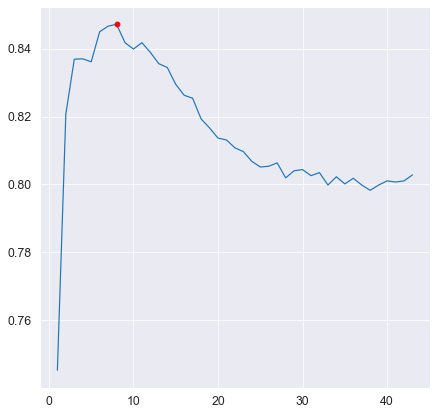

In [54]:
scores = list(map(lambda a: a[1], score_list))

fig = plt.figure(figsize=(7, 7))
plt.grid(b=True)
sns.lineplot(x=range(1, depth+1), y=scores)
plt.plot(scores.index(max(scores)) + 1, max(scores), "or")

In [56]:
print('The best algorithm: DecisionTreeClassifier(max_depth={}), its accuracy: {}'
      .format(scores.index(max(scores)) + 1, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(max_depth=8), its accuracy: 0.847


In [57]:
# min_samples_leaf in already created Decision Tree
default_algos[0][0].get_params()['min_samples_leaf']

1

In [58]:
algorithms = []
for i in range(1, 202, 5):
    algorithms.append(DecisionTreeClassifier(min_samples_leaf=i))
score_list = algorithm_scores()

All predictions finished


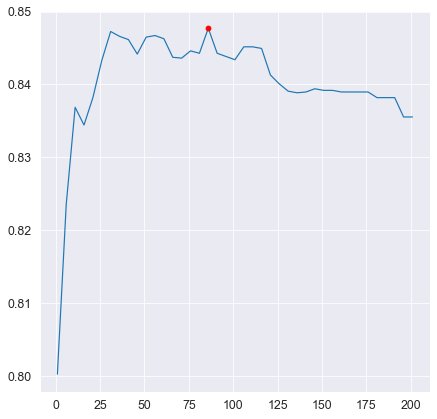

In [59]:
scores = list(map(lambda a: a[1], score_list))
fig = plt.figure(figsize=(7, 7))
plt.grid(b=True)
sns.lineplot(x=range(1, 202, 5), y=scores)
plt.plot(scores.index(max(scores))*5 + 1, max(scores), "or")

In [60]:
print('The best algorithm: DecisionTreeClassifier(min_samples_leaf={}), its accuracy: {}'
      .format(scores.index(max(scores))*5 + 1, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(min_samples_leaf=86), its accuracy: 0.848


In [61]:
# Max depth and min samples leaf

algorithms = []
for i in range(4, 30, 3):
    for j in range(45, 86, 5):
         algorithms.append(DecisionTreeClassifier(max_depth=i, min_samples_leaf=j))
score_list = algorithm_scores()   

All predictions finished


In [62]:



max_depth = list(map(lambda a: a[0].get_params()['max_depth'], score_list))
min_samples_leaf = list(map(lambda a: a[0].get_params()['min_samples_leaf'], score_list))
scores = list(map(lambda a: a[1], score_list))

income_df = pd.DataFrame(np.array([max_depth, min_samples_leaf, scores]).T, 
                  columns=['max_depth', 'min_s_l', 'scores'])

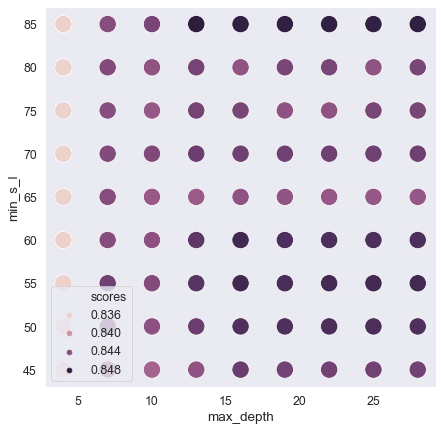

In [64]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=income_df['max_depth'], y=income_df['min_s_l'], hue=income_df['scores'], s=300)
plt.legend(loc='lower left')

In [65]:
best = scores.index(max(scores))
m_d = max_depth[best]
m_s_l = min_samples_leaf[best]
print('The best algorithm: DecisionTreeClassifier(max_depth={}, min_samples_leaf={}), its accuracy: {}'
      .format(m_d, m_s_l, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(max_depth=13, min_samples_leaf=85), its accuracy: 0.848


In [66]:
# based on criteria


algorithms = [DecisionTreeClassifier(criterion='gini'), DecisionTreeClassifier(criterion='entropy')]
score_list = algorithm_scores()   
print('criterion: gini, score: {}.'.format(str(round(score_list[0][1], 3))))
print('criterion: entropy, score: {}.'.format(str(round(score_list[1][1], 3))))

All predictions finished
criterion: gini, score: 0.799.
criterion: entropy, score: 0.803.


In [67]:
# Combining gini, min_samples_leaf, max_depth

algorithms = [DecisionTreeClassifier(criterion='gini', max_depth=9), 
              DecisionTreeClassifier(criterion='gini', min_samples_leaf=66), 
              DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=65)]
df_DT = pd.DataFrame(algorithm_scores(), columns=['algorithm', 'accuracy', 'standardized'])
df_DT

All predictions finished


,algorithm,accuracy,standardized
0,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.842181,False
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.843729,False
2,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.843950,False


In [69]:
### Now we will try to tune logistic Regression

### Fixing and Penalty and C hyperparameters

algorithms = []
for p in ['l1', 'l2']:
    algorithms.append(LogisticRegression(solver='liblinear', penalty=p))
    
df_LR_penalty = pd.DataFrame(algorithm_scores(scaled=True), columns=['algorithm', 'accuracy', 'standardized'])

df_LR_penalty

All predictions finished


,algorithm,accuracy,standardized
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.840522,True
1,"LogisticRegression(C=1.0, class_weight=None, d...",0.838642,True


In [70]:
algorithms = []
for c in [100, 10, 1.0, 0.1, 0.01]:
    algorithms.append(LogisticRegression(solver='liblinear', penalty='l1', C=c))

df_LR = pd.DataFrame(algorithm_scores(scaled=True), columns=['algorithm', 'accuracy', 'standardized'])
df_LR

All predictions finished


,algorithm,accuracy,standardized
0,"LogisticRegression(C=100, class_weight=None, d...",0.839858,True
1,"LogisticRegression(C=10, class_weight=None, du...",0.839969,True
2,"LogisticRegression(C=1.0, class_weight=None, d...",0.840522,True
3,"LogisticRegression(C=0.1, class_weight=None, d...",0.838974,True
4,"LogisticRegression(C=0.01, class_weight=None, ...",0.815970,True


In [71]:
# Tuning K Neighbours 


algorithms = [KNeighborsClassifier(weights='uniform'), 
              KNeighborsClassifier(weights='distance')]
df_KN_weights = pd.DataFrame(algorithm_scores(scaled=True), columns=['algorithm', 'accuracy', 'standardized'])
df_KN_weights

All predictions finished


,algorithm,accuracy,standardized
0,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.819288,True
1,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.812873,True


In [72]:
algorithms = []
for i in range(1, 50, 5):
    algorithms.append(KNeighborsClassifier(n_neighbors=i))
    
df_KN_n_neighbors = pd.DataFrame(algorithm_scores(scaled=True), columns=['algorithm', 'accuracy', 'standardized'])

All predictions finished


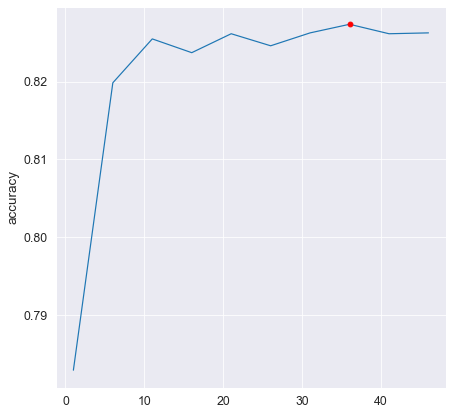

In [73]:
fig = plt.figure(figsize=(7, 7))
plt.grid(b=True)
sns.lineplot(x=range(1, 50, 5), y=df_KN_n_neighbors['accuracy'])
plt.plot(df_KN_n_neighbors[df_KN_n_neighbors['accuracy'] == max(df_KN_n_neighbors['accuracy'])].index.values[0]*5+1,
         max(df_KN_n_neighbors['accuracy']),
         "or")

In [74]:
# Finally, comparing all the models


algorithms = [DecisionTreeClassifier(), 
              DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=65),
              LogisticRegression(solver='liblinear'), 
              LogisticRegression(C=10, penalty='l1', solver='liblinear'),
              KNeighborsClassifier(), 
              KNeighborsClassifier(n_neighbors=46)]

final_list = algorithm_scores()

All predictions finished


In [75]:
algorithms = [DecisionTreeClassifier(), 
              DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=65),
              LogisticRegression(solver='liblinear'), 
              LogisticRegression(C=10, penalty='l1', solver='liblinear'),
              KNeighborsClassifier(), 
              KNeighborsClassifier(n_neighbors=46)]
final_list = final_list + algorithm_scores(scaled=True)

All predictions finished


In [76]:
final_df = pd.DataFrame(final_list, columns=['algorithm', 'accuracy', 'standardized'])
final_df.head(12).sort_values(by='accuracy', ascending=False)

,algorithm,accuracy,standardized
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.843729,False
7,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.843729,True
3,"LogisticRegression(C=10, class_weight=None, du...",0.840301,False
9,"LogisticRegression(C=10, class_weight=None, du...",0.839969,True
8,"LogisticRegression(C=1.0, class_weight=None, d...",0.838642,True
11,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.826255,True
10,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.819288,True
0,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.800376,False
6,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.799934,True
2,"LogisticRegression(C=1.0, class_weight=None, d...",0.786662,False
